In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
File = "./output.txt"

'''
Experiment 1
COL = 6
X = ["unique","zipf-0.3","zipf-0.6","zipf-0.9","zipf-1.2","zipf-1.5"]
X_LABLE = "distribution"
Y_LABLE_1 = "average normalized deviation"
Y_LABLE_2 = "99% percentile deviation"
'''

COL = 2
X = ["1000","2500"] #,"5000","7500","10000","25000","50000"]
X_LABLE = "distribution"
Y_LABLE_1 = "average normalized deviation"
Y_LABLE_2 = "99% percentile deviation"

In [7]:
def draw(distribution):
    fp = open(File, "r")
    
    insertionOnly_avg_dev = []
    general_avg_dev = []
    turnstile_avg_dev = []
    pairwise_avg_dev = []
    baseline1_avg_dev = []
    
    insertionOnly_percent_dev = []
    general_percent_dev = []
    turnstile_percent_dev = []
    pairwise_percent_dev = []
    baseline1_percent_dev = []
    
    file = ""
    
    # obtain results
    for line in fp:
        # line contain file information
        if "####file" in line:
            file = line
            continue
            
        if distribution not in file:
            continue
            
        data = line.split(',')
        
        # parse data 
        if "avg_dev" in line:
            insertionOnly_avg_dev.append(float(data[1].split(':')[1]))
            general_avg_dev.append(float(data[2].split(':')[1]))
            turnstile_avg_dev.append(float(data[3].split(':')[1]))
            pairwise_avg_dev.append(float(data[4].split(':')[1]))
            baseline1_avg_dev.append(float(data[5].split(':')[1]))
        elif "percentile_dev" in line:
            insertionOnly_percent_dev.append(float(data[1].split(':')[1]))
            general_percent_dev.append(float(data[2].split(':')[1]))
            turnstile_percent_dev.append(float(data[3].split(':')[1]))
            pairwise_percent_dev.append(float(data[4].split(':')[1]))
            baseline1_percent_dev.append(float(data[5].split(':')[1]))
    
    avg_dev = [insertionOnly_avg_dev, general_avg_dev, turnstile_avg_dev, pairwise_avg_dev, baseline1_avg_dev]
    percent_dev = [insertionOnly_percent_dev, general_percent_dev, turnstile_percent_dev, pairwise_percent_dev, baseline1_percent_dev]
    
    # start drawing
    plt.rcParams["figure.dpi"] = 128
    plt.rcParams['figure.figsize'] = 10, 5
    plot(avg_dev, 1)
    plt.title(Y_LABLE_1)
    plt.xlabel(X_LABLE)
    plot(percent_dev, 2)
    plt.title(Y_LABLE_2)
    plt.xlabel(X_LABLE)
    plt.legend(loc='upper right')
    plt.show()

In [8]:
def plot(data, index):
    plt.subplot(1, 2, index)
    
    df = pd.DataFrame({'x':X, 'insertionOnly':data[0], 'general':data[1], 'turnstile':data[2],
        'pairwise':data[3], 'baseline':data[4] })
    
    plt.plot('x', 'insertionOnly', data=df, linewidth=1)
    plt.plot('x', 'general', data=df, linewidth=1)
    plt.plot('x', 'turnstile', data=df, linewidth=1)
    plt.plot('x', 'pairwise', data=df, linewidth=1)
    plt.plot('x', 'baseline', data=df, linewidth=1)

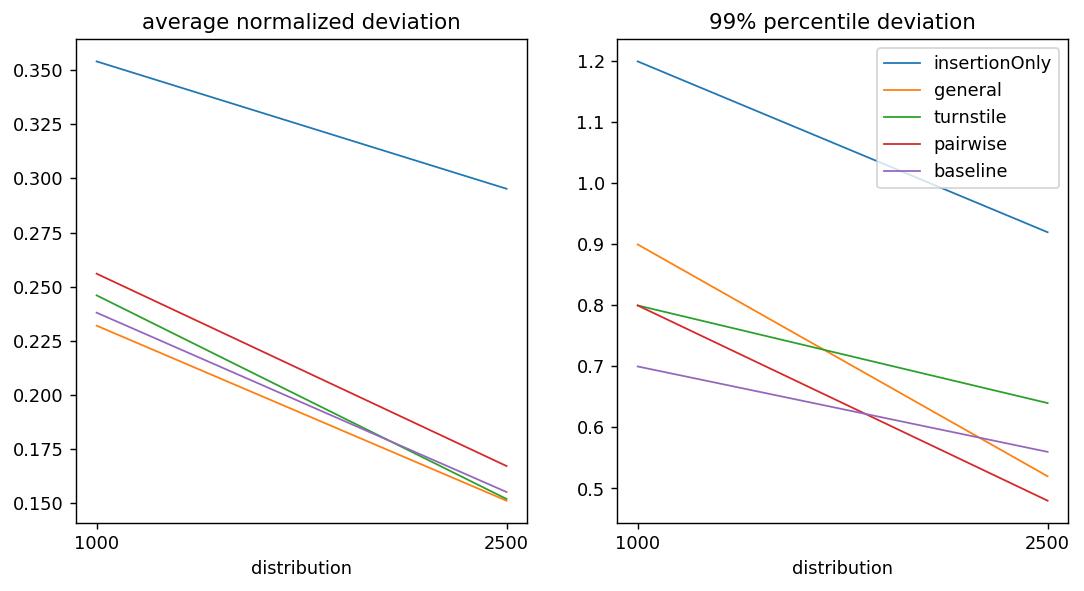

In [9]:
draw("insertionOnly")
#draw("turnstile")
#draw("general")